# K Nearest Neigbours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.neighbors import KNeighborsClassifier
# help(KNeighborsClassifier)

In [6]:
data = pd.read_csv('../seminar01/bioresponse.csv')

In [7]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


Для удобства визуализации работы KNN давайте выберем пару признаков, на которых будем его обучать. Для наглядности здорово было бы выбрать два достаточно важных признака. Давайте подумаем, как это можно сделать.

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
X_full = data[[c for c in data if c != 'Activity']]
y = data.Activity

In [10]:
rf = RandomForestClassifier(100, random_state=0)
rf.fit(X_full, y)

RandomForestClassifier(random_state=0)

Воспользуемся важностью признаков от случайного леса (подробнее об этом будет дальше в курсе)

In [11]:
imps = rf.feature_importances_

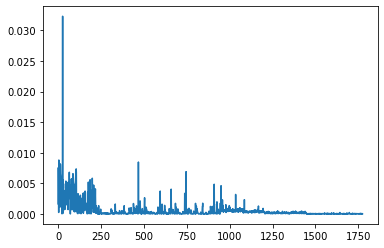

In [12]:
plt.plot(imps)

In [13]:
imps_sorted_indices = np.argsort(imps)

In [14]:
imps[imps_sorted_indices]

array([0.        , 0.        , 0.        , ..., 0.00847999, 0.00881522,
       0.03232262])

Выберем пару достаточно важных признаков с большим количеством уникальных значений (снова для визуализации :)

In [15]:
feature1, feature2 = X_full.columns[imps_sorted_indices[[-2, -4]]]
feature1, feature2

('D5', 'D10')

Нарисуем объекты в пространстве этих признаков

<AxesSubplot:xlabel='D5', ylabel='D10'>

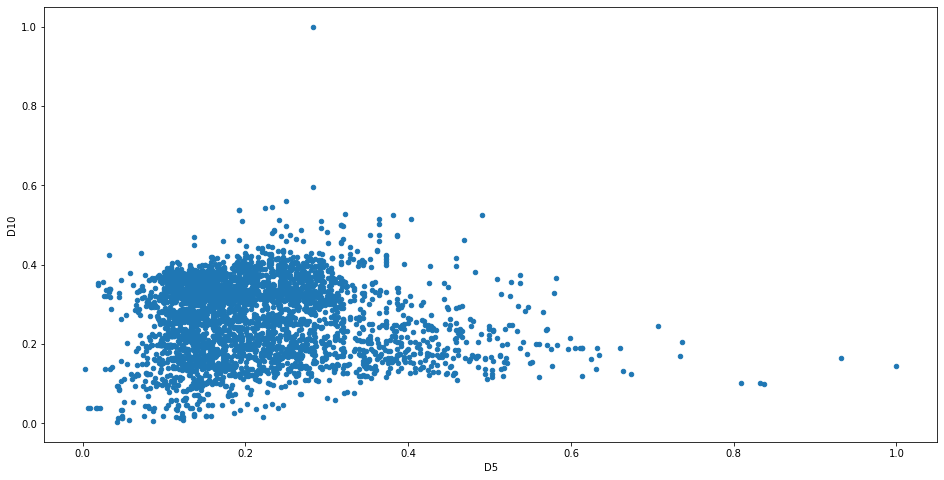

In [16]:
data.plot(x=feature1, y=feature2, kind='scatter', figsize=(16,8))

Чтобы построить лучшую иллюстрацию работы KNN, посмотрим на небольшой прямоугольник в пространстве двух выбранных признаков и раскрасим объекты соответственно меткам классов

<AxesSubplot:xlabel='D5', ylabel='D10'>

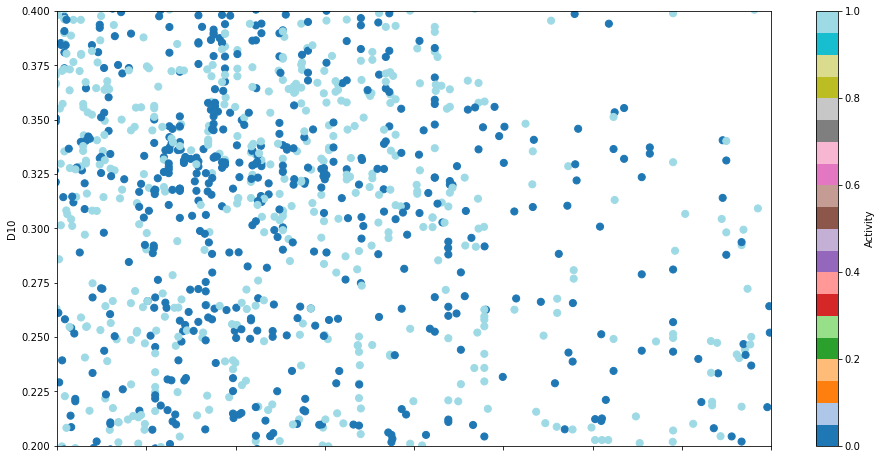

In [17]:
x1, x2 = 0.2, 0.4
y1, y2 = 0.2, 0.4
plot_kwargs = {'x': feature1, 
               'y': feature2,
               'kind': 'scatter',
               'figsize': (16,8),
               'xlim': (x1, x2), 
               'ylim': (y1, y2),
               'c': 'Activity',
               'cmap': 'tab20'
              }

data.plot(s=50, **plot_kwargs)

Обучим KNN на выбранных признаках и нарисуем разделяющую поверхность классификатора

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(n_neighbors=1)

In [19]:
X = data[[feature1, feature2]]
y = data.Activity
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

Чтобы визуализировать разделяющую поверхность, сгенерируем сетку из точек, для каждой из которых предскажем класс

In [20]:
xs = np.linspace(x1, x2, 100)
ys = np.linspace(y1, y2, 100)
xs

array([0.2       , 0.2020202 , 0.2040404 , 0.20606061, 0.20808081,
       0.21010101, 0.21212121, 0.21414141, 0.21616162, 0.21818182,
       0.22020202, 0.22222222, 0.22424242, 0.22626263, 0.22828283,
       0.23030303, 0.23232323, 0.23434343, 0.23636364, 0.23838384,
       0.24040404, 0.24242424, 0.24444444, 0.24646465, 0.24848485,
       0.25050505, 0.25252525, 0.25454545, 0.25656566, 0.25858586,
       0.26060606, 0.26262626, 0.26464646, 0.26666667, 0.26868687,
       0.27070707, 0.27272727, 0.27474747, 0.27676768, 0.27878788,
       0.28080808, 0.28282828, 0.28484848, 0.28686869, 0.28888889,
       0.29090909, 0.29292929, 0.29494949, 0.2969697 , 0.2989899 ,
       0.3010101 , 0.3030303 , 0.30505051, 0.30707071, 0.30909091,
       0.31111111, 0.31313131, 0.31515152, 0.31717172, 0.31919192,
       0.32121212, 0.32323232, 0.32525253, 0.32727273, 0.32929293,
       0.33131313, 0.33333333, 0.33535354, 0.33737374, 0.33939394,
       0.34141414, 0.34343434, 0.34545455, 0.34747475, 0.34949

Воспользуемся модулем itertools, чтобы составить X_test из всех точек сетки

In [21]:
from itertools import product

test_points = np.array(list(product(xs, ys)))
test = pd.DataFrame(test_points, columns=[feature1, feature2])

test['Activity'] = knn.predict_proba(test)[:,1]

<AxesSubplot:xlabel='D5', ylabel='D10'>

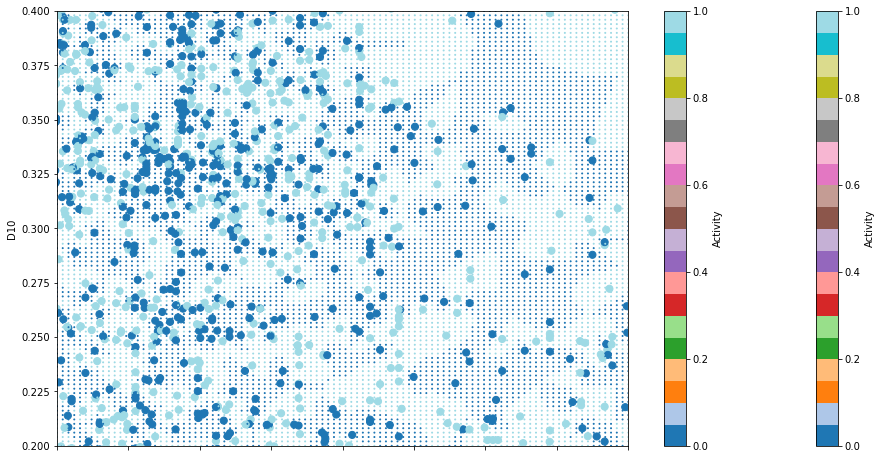

In [22]:
ax = data.plot(s=50, **plot_kwargs)

test.plot(ax=ax, s=1, alpha=1, **plot_kwargs)

Вопрос: зависит ли качество KNN от масштабирования признаков?

In [23]:
from sklearn.model_selection import cross_val_score

def get_scaled_X(s1=1, s2=1):
    X_copy = data[[feature1, feature2]].values.copy()
    X_copy[:,0] = X_copy[:,0] * s1
    X_copy[:,1] = X_copy[:,1] * s2
    return X_copy

cross_val_score(KNeighborsClassifier(n_neighbors=1), get_scaled_X(1, 1), y, cv=2, scoring='accuracy')

array([0.56982942, 0.58186667])

In [24]:
cross_val_score(KNeighborsClassifier(n_neighbors=1), get_scaled_X(10, 1), y, cv=2, scoring='accuracy')

array([0.58208955, 0.57653333])

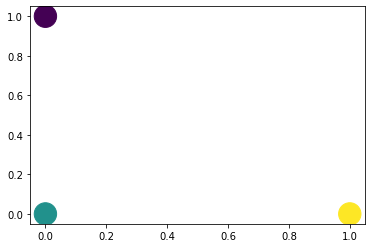

In [25]:
X_ = np.array([[0, 1],
               [1, 0],
               [0, 0]])

y_ = [0, 1, 0.5]

plt.scatter(X_[:,0], X_[:,1], c=y_, s=500)

In [26]:
cross_val_score(KNeighborsClassifier(n_neighbors=1), get_scaled_X(1e6, 1), y, cv=2, scoring='accuracy')

array([0.56183369, 0.57546667])

In [27]:
cross_val_score(KNeighborsClassifier(n_neighbors=1), get_scaled_X(0,1), y, cv=2, scoring='accuracy')

array([0.55490405, 0.568     ])

Сравним качество KNN, RF и LogReg на двух приведенных признаках

In [28]:
cross_val_score(KNeighborsClassifier(n_neighbors=1), X, y, cv=2, scoring='accuracy')

array([0.56982942, 0.58186667])

In [29]:
cross_val_score(KNeighborsClassifier(n_neighbors=50), X, y, cv=2, scoring='accuracy')

array([0.63646055, 0.63786667])

In [30]:
cross_val_score(KNeighborsClassifier(n_neighbors=50, weights='distance'), X, y, cv=2, scoring='accuracy')

array([0.63059701, 0.62986667])

In [31]:
from sklearn.linear_model import LogisticRegression
cross_val_score(LogisticRegression(), X, y, cv=2)

array([0.60767591, 0.59626667])

In [32]:
cross_val_score(RandomForestClassifier(100), X, y, cv=2)

array([0.61567164, 0.62826667])

Сравним качество KNN, RF и LogReg на всех признаках

In [30]:
from sklearn.linear_model import LogisticRegression
cross_val_score(LogisticRegression(), X_full, y, cv=2)

array([0.72601279, 0.73226667])

In [31]:
cross_val_score(RandomForestClassifier(100), X_full, y, cv=2)

array([0.78624733, 0.776     ])

In [32]:
cross_val_score(KNeighborsClassifier(n_neighbors=10, weights='distance'), X_full, y, cv=2, scoring='accuracy')

array([0.7217484 , 0.72373333])

Вспомним о том, что признаки для KNN нужно нормализовывать

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

In [35]:
cross_val_score(KNeighborsClassifier(n_neighbors=10, weights='distance'), X_scaled, y, cv=2, scoring='accuracy')

array([0.73720682, 0.74026667])

In [36]:
X_scaled_imps = X_scaled * imps

In [37]:
cross_val_score(KNeighborsClassifier(n_neighbors=10, weights='distance'), X_scaled_imps, y, cv=2, scoring='accuracy')

array([0.77452026, 0.776     ])